In [1]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the 'Heart_Disease' dataset by using pandas library

hddata = pd.read_csv(r"D:\iiit notes\Internship\16 season 1 jun-2021\Heart_Disease.csv", header = 0)
hddata.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [3]:
# Display the dataset information

hddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [4]:
# Display the unique values for each varaiable

hddata.nunique()

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
num           5
dtype: int64

In [5]:
# Display all values in the columns

for i in hddata.columns:
    print(hddata[i].value_counts())

58    19
57    17
54    16
59    14
52    13
51    12
60    12
62    11
44    11
56    11
41    10
64    10
63     9
67     9
65     8
55     8
61     8
53     8
45     8
43     8
42     8
50     7
66     7
48     7
46     7
49     5
47     5
70     4
39     4
68     4
35     4
69     3
40     3
71     3
37     2
38     2
34     2
76     1
29     1
74     1
77     1
Name: age, dtype: int64
1    206
0     97
Name: sex, dtype: int64
4    144
3     86
2     50
1     23
Name: cp, dtype: int64
120    37
130    36
140    32
110    19
150    17
128    12
138    12
125    11
160    11
112     9
132     8
118     7
108     6
124     6
135     6
152     5
134     5
145     5
100     4
122     4
170     4
126     3
115     3
105     3
136     3
180     3
142     3
146     2
148     2
178     2
94      2
144     2
102     2
164     1
192     1
101     1
174     1
172     1
104     1
165     1
106     1
129     1
158     1
156     1
155     1
154     1
114     1
117     1
123     1
200     1
Name: 

In [6]:
# Replace '?', value in variables for 'ca' and 'thal'
# Replace it by least value

hddata['ca'] = hddata['ca'].str.replace('?', '3')
hddata['ca'] = hddata['ca'].astype(int)

hddata['thal'] = hddata['thal'].str.replace('?', '6')
hddata['thal'] = hddata['thal'].astype(int)

In [7]:
# Display descriptive statistics data for each column

hddata.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [8]:
# Identify the Target and Independent variable

IndepVar = []

for col in hddata.columns:
    if col != 'num':
        IndepVar.append(col)
        
TargetVar = 'num'

x = hddata[IndepVar]
y = hddata[TargetVar]

In [9]:
# Split the dataset into train and test for random_state=6

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 6)

# Logistic Regression with random sampling

In [10]:
# To build the 'Logistic Regression' model with random sampling 

from sklearn.linear_model import LogisticRegression 
hddataLR = LogisticRegression(multi_class='multinomial', penalty='none', solver='newton-cg', random_state=0) 
hddataLR = hddataLR.fit(x_train,y_train)

In [11]:
# Predict the model with test data

y_pred = hddataLR.predict(x_test)

In [12]:
# Display all Algorithm parameters

params1 = hddataLR.get_params()
print(params1)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'none', 'random_state': 0, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [13]:
# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Vertical is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred

# Class = Label 0-4

lst_classes = [0, 1, 2, 3, 4]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fp = arr_data[0][1]
    tn = arr_data[0][0]
    fn = arr_data[1][0]

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    m = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(m), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);

    print("TP={0}, FP={1}, TN={2}, FN={3}".format(tp, fp, tn, fn));
    print("Accuracy: {0}".format(accuracy)); # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient

[[50 11  3  3  0]
 [ 1  1  2  1  0]
 [ 0  3  1  4  2]
 [ 0  2  3  1  0]
 [ 0  0  2  1  0]]
Print Class: 0
TP=50, FP=17, TN=23, FN=1
Accuracy: 0.802
Precision: 0.746
Sensitivity: 0.98
F1-Score: 0.847
Specificity: 0.575
Balanced Accuracy: 0.778
MCC: 0.626

Print Class: 1
TP=1, FP=4, TN=70, FN=16
Accuracy: 0.78
Precision: 0.2
Sensitivity: 0.059
F1-Score: 0.091
Specificity: 0.946
Balanced Accuracy: 0.502
MCC: 0.008

Print Class: 2
TP=1, FP=9, TN=71, FN=10
Accuracy: 0.791
Precision: 0.1
Sensitivity: 0.091
F1-Score: 0.095
Specificity: 0.888
Balanced Accuracy: 0.49
MCC: -0.023

Print Class: 3
TP=1, FP=5, TN=76, FN=9
Accuracy: 0.846
Precision: 0.167
Sensitivity: 0.1
F1-Score: 0.125
Specificity: 0.938
Balanced Accuracy: 0.519
MCC: 0.048

Print Class: 4
TP=0, FP=3, TN=86, FN=2
Accuracy: 0.945
Precision: 0.0
Sensitivity: 0.0
F1-Score: 0.0
Specificity: 0.966
Balanced Accuracy: 0.483
MCC: -0.028



In [14]:
# OVERALL - FINAL PREDICTION PERFORMANCE

# importing mean()

from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)));

Overall Performance Prediction:
Accuracy: 83.28%
Precision: 24.26%
Recall or Sensitivity: 24.6%
F1-Score: 0.2316
Specificity or True Nagative Rate: 86.26%
Balanced Accuracy: 55.44%

MCC: 0.1262



In [15]:
# Fit OneVsRestClassifier model to calculate the ROC SUC and plot ROC curve

from sklearn.multiclass import OneVsRestClassifier

modelORC = OneVsRestClassifier(LogisticRegression())
modelORC.fit(x_train, y_train)
y1_pred = modelORC.predict(x_test)
y1_pred_proba = modelORC.predict_proba(x_test)
print(y1_pred_proba)

[[0.51604878 0.37783267 0.04392568 0.02318904 0.03900383]
 [0.8962132  0.0830002  0.01323825 0.00147343 0.00607491]
 [0.0099643  0.17633263 0.07302762 0.45192143 0.28875402]
 [0.84604338 0.10763163 0.00851698 0.01171366 0.02609434]
 [0.56143504 0.37765857 0.01753901 0.00716649 0.0362009 ]
 [0.87760364 0.1056697  0.00438923 0.00647437 0.00586305]
 [0.50809387 0.31308895 0.09731684 0.0249951  0.05650523]
 [0.88571011 0.08940363 0.00899733 0.00635844 0.0095305 ]
 [0.65529777 0.21164552 0.00873368 0.10097172 0.02335131]
 [0.78537316 0.16311545 0.0253643  0.0084288  0.01771828]
 [0.10273711 0.26091073 0.49856823 0.11672291 0.02106102]
 [0.78333467 0.12722291 0.00358127 0.0362895  0.04957164]
 [0.77020934 0.09176805 0.10600678 0.00832868 0.02368715]
 [0.839839   0.12637777 0.00559359 0.00728532 0.02090432]
 [0.71612496 0.09235199 0.07333577 0.09047039 0.02771688]
 [0.89792956 0.08431717 0.00672311 0.0039617  0.00706845]
 [0.02962678 0.11239416 0.15903183 0.6550074  0.04393983]
 [0.84167747 0

In [16]:
# ROC AUC SCORE
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

ROC_AUC_Score = roc_auc_score(y_test, y1_pred_proba, multi_class='ovr', average='weighted')
print('ROC Score: ', round(ROC_AUC_Score, 3))

ROC Score:  0.773


In [17]:
#transform confusion matrix into array 
#the matrix is stored in a vaiable called confmtrx 

confmtrx = np.array(confusion_matrix(y_test, y_pred))

In [18]:
# Create DataFrame from confmtrx array

pd.DataFrame(confmtrx, index=['num_0','num_1', 'num_2', 'num_3', 'num_4' ], 
             columns=['predicted_num_0', 'predicted_num_1', 'predicted_num_2', 'predicted_num_3', 'predicted_num_4'])

,predicted_num_0,predicted_num_1,predicted_num_2,predicted_num_3,predicted_num_4
num_0,50,1,0,0,0
num_1,11,1,3,2,0
num_2,3,2,1,3,2
num_3,3,1,4,1,1
num_4,0,0,2,0,0


Feature: 0, Score: -0.01205
Feature: 1, Score: -0.30909
Feature: 2, Score: -0.39018
Feature: 3, Score: -0.01125
Feature: 4, Score: 0.00143
Feature: 5, Score: 1.60522
Feature: 6, Score: -0.39108
Feature: 7, Score: 0.01038
Feature: 8, Score: -1.44044
Feature: 9, Score: -0.44597
Feature: 10, Score: -0.40032
Feature: 11, Score: -0.85419
Feature: 12, Score: -0.36760


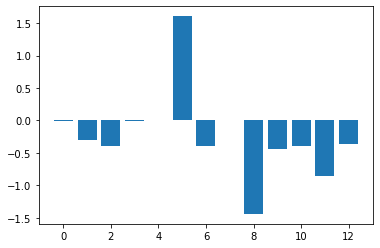

In [19]:
# To build the 'Logistic Regression' model with random sampling
# get importance
from matplotlib import pyplot
importance = hddataLR.coef_[0]

# Summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

# Plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# The positive scores indicate a feature that predicts class 1, 2, 3, & 4 
# whereas the negative scores indicate a feature that predicts class 0.

In [20]:
PredResults = pd.DataFrame({'num':y_test, 'num_pred':y_pred})
PredResults

,num,num_pred
290,1,1
84,0,0
293,2,3
253,0,0
275,0,1
...,...,...
214,1,0
219,0,0
291,0,0
166,0,0


In [21]:
# Merge two Dataframes on index of both the dataframes

TestDataResults = x_test.merge(PredResults, left_index=True, right_index=True)
TestDataResults.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,num_pred
290,67,1,3,152,212,0,2,150,0,0.8,2,0,7,1,1
84,52,1,2,120,325,0,0,172,0,0.2,1,0,3,0,0
293,63,1,4,140,187,0,2,144,1,4.0,1,2,7,2,3
253,51,0,3,120,295,0,2,157,0,0.6,1,0,3,0,0
275,64,1,1,170,227,0,2,155,0,0.6,2,0,7,0,1


In [22]:
TestDataResults.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,num_pred
10,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0,0
140,59,1,2,140,221,0,0,164,1,0.0,1,0,3,0,0
296,59,1,4,164,176,1,2,90,0,1.0,2,2,6,3,2
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,0
170,70,1,3,160,269,0,0,112,1,2.9,2,1,7,3,2
253,51,0,3,120,295,0,2,157,0,0.6,1,0,3,0,0
52,44,1,4,112,290,0,2,153,0,0.0,1,1,3,2,0
268,40,1,4,152,223,0,0,181,0,0.0,1,0,7,1,0
200,50,0,4,110,254,0,2,159,0,0.0,1,0,3,0,0
54,60,1,4,130,253,0,0,144,1,1.4,1,1,7,1,2


In [23]:
TestDataResults.shape

(91, 15)

# Logistic Regression with Stratified sampling

In [24]:
# Split the data into train and test (Stratified sampling) 

from sklearn.model_selection import train_test_split 
x1_train, x1_test, y1_train, y1_test = train_test_split(x, y, test_size=0.3, random_state=6, 
                                                        stratify=hddata[['fbs', 'restecg', 'exang']])

In [25]:
# To build the 'Logistic Regression' model with random sampling 

from sklearn.linear_model import LogisticRegression 
hddataLR1 = LogisticRegression(multi_class='multinomial', penalty='none', solver='newton-cg', random_state=0) 
hddataLR1 = hddataLR.fit(x1_train,y1_train)

In [26]:
# Predict the model with test data

y1_pred = hddataLR.predict(x1_test)

In [27]:
params1 = hddataLR1.get_params()
print(params1)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'none', 'random_state': 0, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [28]:
# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y1_pred, y1_test)) # Vertical is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y1_test
lst_predicted_class = y1_pred

# Class = Label 0-4

lst_classes = [0, 1, 2, 3, 4]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fp = arr_data[0][1]
    tn = arr_data[0][0]
    fn = arr_data[1][0]

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    m = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(m), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);

    print("TP={0}, FP={1}, TN={2}, FN={3}".format(tp, fp, tn, fn));
    print("Accuracy: {0}".format(accuracy)); # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient

[[40  5  3  0  1]
 [ 5  4  3  6  1]
 [ 2  3  0  4  2]
 [ 0  1  2  4  1]
 [ 0  1  2  1  0]]
Print Class: 0
TP=40, FP=9, TN=35, FN=7
Accuracy: 0.824
Precision: 0.816
Sensitivity: 0.851
F1-Score: 0.833
Specificity: 0.795
Balanced Accuracy: 0.823
MCC: 0.648

Print Class: 1
TP=4, FP=15, TN=62, FN=10
Accuracy: 0.725
Precision: 0.211
Sensitivity: 0.286
F1-Score: 0.242
Specificity: 0.805
Balanced Accuracy: 0.546
MCC: 0.081

Print Class: 2
TP=0, FP=11, TN=70, FN=10
Accuracy: 0.769
Precision: 0.0
Sensitivity: 0.0
F1-Score: 0.0
Specificity: 0.864
Balanced Accuracy: 0.432
MCC: -0.13

Print Class: 3
TP=4, FP=4, TN=72, FN=11
Accuracy: 0.835
Precision: 0.5
Sensitivity: 0.267
F1-Score: 0.348
Specificity: 0.947
Balanced Accuracy: 0.607
MCC: 0.28

Print Class: 4
TP=0, FP=4, TN=82, FN=5
Accuracy: 0.901
Precision: 0.0
Sensitivity: 0.0
F1-Score: 0.0
Specificity: 0.953
Balanced Accuracy: 0.476
MCC: -0.052



In [29]:
# OVERALL - FINAL PREDICTION PERFORMANCE

# importing mean()

from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)));

Overall Performance Prediction:
Accuracy: 81.08%
Precision: 30.54%
Recall or Sensitivity: 28.08%
F1-Score: 0.2846
Specificity or True Nagative Rate: 87.28%
Balanced Accuracy: 57.68%

MCC: 0.1654



In [30]:
# Fit OneVsRestClassifier model to calculate the ROC SUC and plot ROC curve

from sklearn.multiclass import OneVsRestClassifier

modelORC = OneVsRestClassifier(LogisticRegression())
modelORC.fit(x1_train, y1_train)
y1_pred = modelORC.predict(x1_test)
y1_pred_proba = modelORC.predict_proba(x1_test)
print(y1_pred_proba)

[[6.61309115e-02 4.00446705e-01 1.85101699e-01 1.08646118e-01
  2.39674566e-01]
 [6.06151734e-01 3.74445450e-01 6.67189366e-03 5.50685243e-03
  7.22407013e-03]
 [3.82823897e-02 5.83370911e-02 1.93921823e-01 5.41843658e-01
  1.67615038e-01]
 [3.43623072e-01 2.31660923e-01 1.64547223e-01 2.46991214e-01
  1.31775682e-02]
 [4.79508928e-03 7.18287458e-02 2.59876407e-01 6.00877313e-01
  6.26224458e-02]
 [8.57811511e-01 1.29170962e-01 1.10921583e-02 1.69419895e-03
  2.31169855e-04]
 [6.50629789e-01 1.67593309e-01 1.22024804e-01 1.81118511e-02
  4.16402462e-02]
 [8.67137858e-02 1.21614228e-01 2.77613334e-01 4.88293605e-01
  2.57650473e-02]
 [1.85592226e-01 2.74977245e-01 3.19505520e-01 1.54028319e-01
  6.58966901e-02]
 [7.72745423e-01 2.06737062e-01 1.43563592e-02 3.82635698e-03
  2.33479872e-03]
 [8.09845536e-01 1.52740177e-01 1.85141774e-02 1.07423947e-02
  8.15771421e-03]
 [6.91920695e-01 1.63234819e-01 1.31391648e-01 5.33836987e-03
  8.11446760e-03]
 [7.93392658e-01 1.55882805e-01 2.456466

In [31]:
# ROC AUC SCORE

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

ROC_AUC_Score = roc_auc_score(y1_test, y1_pred_proba, multi_class='ovr', average='weighted')
print('ROC Score: ', round(ROC_AUC_Score, 3))

ROC Score:  0.759


In [32]:
#transform confusion matrix into array 
#the matrix is stored in a vaiable called confmtrx 

confmtrx = np.array(confusion_matrix(y1_test, y1_pred))

In [33]:
# Create DataFrame from confmtrx array

pd.DataFrame(confmtrx, index=['num_0','num_1', 'num_2', 'num_3', 'num_4' ], 
             columns=['predicted_num_0', 'predicted_num_1', 'predicted_num_2', 'predicted_num_3', 'predicted_num_4'])

,predicted_num_0,predicted_num_1,predicted_num_2,predicted_num_3,predicted_num_4
num_0,44,2,1,0,0
num_1,8,1,3,1,1
num_2,4,4,0,2,0
num_3,3,5,4,3,0
num_4,2,1,1,1,0
